<h1>I. Introduction</h1>

# Domain-specific area

In order to develop a machine learning model that applies techniques from data visualization and statistical analysis, I identified an issue concerning the relationship between changes in minimum wage and changes in employment. The relevant domain is labor economics.

In this project, I am going to use the results of David Card and Alan Krueger’s study, <cite>[Minimum Wages and Employment: A Case Study of the Fast-Food Industry in New Jersey and Pennsylvania][1]</cite>, to create a machine learning model that predicts changes in full-time employment. The abstract of Card and Krueger’s study is as follows: 

>On April 1, 1992, New Jersey’s minimum wage rose from USD4.25 to USD5.05 per hour. To evaluate the impact of the law we surveyed 410 fast-food restaurants in New Jersey and eastern Pennsylvania before and after the rise. Comparisons of employment growth at stores in New Jersey and Pennsylvania (where the minimum wage was constant) provide simple estimates of the effect of the higher minimum wage. We also compare employment changes at stores in New Jersey that were initially paying high wages (above USD5) to the changes at lower-wage stores. We find no indication that the rise in the minimum wage reduced employment. 

Card and Krueger employ a statistical tool called difference-in-differences, which is broadly used by empirical economists to explore a change (such as a change in law) that affected one group, but not another and where they can assume that, in the absence of that change, the difference between the two groups would have been stable over time. My machine learning model is also based on difference-in-differences. I selected this issue in the domain of labor economics and this dataset from this study because if we can predict the impact of minimum wage changes on employment at a specific location based on the characteristics of the distribution, we can predict the impact in other locations and with respect to other companies with similar distribution characteristics. My model will be helpful in evaluating the potential impact of labor policy changes before they are enacted. 

[1]: https://davidcard.berkeley.edu/papers/njmin-aer.pdf

# Dataset

I identified the dataset from the David and Alan's study as a suitable dataset for the problem domain. The accompanying data was used to study the effects of an increase in the minimum wage on unemployment. 

## Description
This dataset contains the minimum wage before and after the change and the associated number of employees in each fast food chain in New Jersey and Pennsylvania. It includes dummy variables to indicate the store location and a categorical variable to indicate the type of chain.

This dataset is able to address all steps outlined in the assignment. In other words, using this dataset, I can perform  preprocessing, summarize the data statistically, visualize the data, create a machine learning prediction model, evaluate its performance, and conclude and discuss my project.

The dataset contains the following variables:

Note: NJ refers to New Jersey and PA refers to Pennsylvania

- chain: 1=Burger King; 2=KFC; 3=Roy Rogers; 4=Wendy's
- state: 1 if NJ; 0 if PA  
- southj:  1 if in southern NJ
- centralj: 1 if in central NJ
- northj:  1 if in northern NJ
- shore: 1 if on NJ shore
- pa1:1 if in PA, northeast suburbs of Philadelphia
- pa2: 1 if in PA, all other areas besides the northeast suburbs of Philadelphia
- empft: number of full-time employees before the change in the minimum wage
- emppt: number of part-time employees before the change in the minimum wage
- wage_st:   starting wage in the local (per hour) before the change in the minimum wage
- empft2: number of full-time employees after the change in the minimum wage
- emppt2: number of part-time employees after the change in the minimum wage
- wage_st2: starting wage in the local (per hour) after the change in the minimum wage

The head of the dataset is as follows: 

In [64]:
import pandas as pd
import numpy as np

# Read CSV data
df = pd.read_csv('fastfood.csv')
df.head(10)

,chain,state,southj,centralj,northj,shore,pa1,pa2,empft,emppt,wage_st,empft2,emppt2,wage_st2
0,1,0,0,0,0,0,1,0,30.0,15.0,NaN,3.5,35.0,4.30
1,2,0,0,0,0,0,1,0,6.5,6.5,NaN,0.0,15.0,4.45
2,2,0,0,0,0,0,1,0,3.0,7.0,NaN,3.0,7.0,5.00
3,4,0,0,0,0,0,1,0,20.0,20.0,5.00,0.0,36.0,5.25
4,4,0,0,0,0,0,1,0,6.0,26.0,5.50,28.0,3.0,4.75
5,1,0,0,0,0,0,0,1,50.0,35.0,5.00,15.0,18.0,4.75
6,1,0,0,0,0,0,0,1,10.0,17.0,5.00,26.0,9.0,5.00
7,2,0,0,0,0,0,0,1,2.0,8.0,5.25,3.0,12.0,5.00
8,2,0,0,0,0,0,1,0,2.0,10.0,5.00,2.0,9.0,5.00
9,3,0,0,0,0,0,0,1,2.5,20.0,5.00,1.0,25.0,4.75


## Size and Data types
The dataset has size of 14 columns and 392 rows. Currently all data types of the columns are integer or float type of numerical values. 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   chain     392 non-null    int64  
 1   state     392 non-null    int64  
 2   southj    392 non-null    int64  
 3   centralj  392 non-null    int64  
 4   northj    392 non-null    int64  
 5   shore     392 non-null    int64  
 6   pa1       392 non-null    int64  
 7   pa2       392 non-null    int64  
 8   empft     392 non-null    float64
 9   emppt     392 non-null    float64
 10  wage_st   373 non-null    float64
 11  empft2    392 non-null    float64
 12  emppt2    391 non-null    float64
 13  wage_st2  377 non-null    float64
dtypes: float64(6), int64(8)
memory usage: 43.0 KB


## Data acquisition
I acquired the dataset from the MITx's online course: 14.310x Data Analysis for Social Scientists by enrolling the course for free. The dataset is open and freely available from the following source.

## Source
Employment effect dataset, collected by David Card and Alan Krueger in their study. The dataset can be accessed via the link (<cite>[fastfood.csv][2]</cite>) provided by the MITx's free online course: <cite>[14.310x Data Analysis for Social Scientists][3]</cite>, on the edX official website.

[2]: https://courses.edx.org/assets/courseware/v1/da9013939cb425f9730d4b587a3c51b4/asset-v1:MITx+14.310x+2T2019a+type@asset+block/fastfood.csv

[3]: https://www.edx.org/course/data-analysis-for-social-scientists?index=product&queryID=d27e0c40990d5871065ff798f6b078a7&position=3

# Objectives of the project
The primary aim of the project is to develop a machine learning model to predict the change on employment by minimum wage change. 

__Impact and contributions__

The possible contributions of this project that can bring to the economics area in social science can be:

- The novel hypothesis and solution using machine learning model in economics combined with data science 
- The prototype of the machine learning model to predict change in employment on the minimum wage change in specific area and company
- Potential application to other chain restaurants or other states in the US, or perhaps in the other countries
- The distribution characteristics of area and employer in which the model may be applicable
- The impact on decision making by government in minimum wage change

Concretely, I aim to achieve the following objectives in detail:

__Preprocess the dataset__

 - Describe the file type/format and transform it into a dataframe (1NF)
 - Convert dummy variables into a categorical variable
 - Convert a variable 'chain' from numerical to categorical
 - Treat NaN values appropriately

__Identify key series of the dataset and provide statistical summary including:__

 - Measures of central tendency
 - Measures of spread
 - Type of distribution

__Visualize key data series__

 - Plot diagrams with explanations
 - Draw findings and conclusions based on the diagrams
 
__Develop a machine learning model__

 - Identify features for X and a target variable for y 
 - Explain their importance for the model based on the data analysis
 - Justify the selection reason by tuning the optimal number of hyper-parameters
 - Describe the employed ML algorithm with its selection reason
 - Tune the optimal parameters for the ML algorithm
 - Build a regression model using Python libraries
 - Run and test the model

__Write standard Python code including:__

 - Correct code indentation
 - Meaningful name assignment to variables and subroutines 
 - Comments for all variables, subroutines, and calls to library methods

__Evaluate the model results__

 - Evaluate a single run with the optimal number of features using RMSE and R2 scores
 - Evaluate by the number of features using a holdout set with cross validation
 - Plot the performance by the number of features
 
__Evaluate the project__

 - Provide a reflective evaluation in light of the obtained results
 - Describe its contributions to the economics area in social science
 - Discuss transferability of the model to other areas
 - Discuss other approaches for reproduction and review benefits and drawbacks for each 

<h1>II. Implementation</h1>

# Preprocessing
I already transformed the CSV file of the dataset into a dataframe in First Normal Form (1NF). Here, I need to preprocess the categorical data for better visualization and analysis. Also, I need to treat some NaN values as they would produce error in the machine learning model. 

## File type/format

The file type of this dataset is CSV file. I used pandas to transform this file into the dataframe.

## Treat categorical data

Combine sub-categories into a single category and change the data type to category for subjected columns. Use the converted categorical columns for statistical visualization and analysis later.

In [32]:
# Combine sub-categories into a single category
df['location'] = df[['shore', 'southj', 'centralj', 'northj', 'pa1', 'pa2']].idxmax(axis=1)

# Change the data type to category
df['chain'] =  df['chain'].astype('category')
df['location'] =  df['location'].astype('category')

## Treat NaN values
The dataset currently contains 35 of NaN values in total. 

In [33]:
df.isna().sum()

chain        0
state        0
southj       0
centralj     0
northj       0
shore        0
pa1          0
pa2          0
empft        0
emppt        0
wage_st     19
empft2       0
emppt2       1
wage_st2    15
location     0
dtype: int64

Compute the median difference of wage change. 

In [34]:
wage_dif_median = (df['wage_st2'] - df['wage_st']).median()
wage_dif_median

0.4299999999999997

Use this value to impute as much of NaN values in wage_st and wage_st2. I drop a single NaN value in emppt2 because imputing with median could be incorrect for this specific data point and could affect the machine learning model.

In [35]:
# fill na for wage_st2 and wage_st
df.fillna({'wage_st2': df['wage_st'] + wage_dif_median, 
           'wage_st': df['wage_st2'] - wage_dif_median}, inplace=True)

# drop the rest of NaN value and reindex
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

Create new variables 'change_pt' and 'change_ft' that are the differences of the number of employees before and after the minimum wage change. I use them to build the machine learning model that predecits the change on employment. 

The final converted dataset is in 1NF and is ready to be analyzed.

In [36]:
# add change_pt and change_ft columns 
df['change_pt'] = df['emppt2'] - df['emppt']
df['change_ft'] = df['empft2'] - df['empft']
df.head()

,chain,state,southj,centralj,northj,shore,pa1,pa2,empft,emppt,wage_st,empft2,emppt2,wage_st2,location,change_pt,change_ft
0,1,0,0,0,0,0,1,0,30.0,15.0,3.87,3.5,35.0,4.30,pa1,20.0,-26.5
1,2,0,0,0,0,0,1,0,6.5,6.5,4.02,0.0,15.0,4.45,pa1,8.5,-6.5
2,2,0,0,0,0,0,1,0,3.0,7.0,4.57,3.0,7.0,5.00,pa1,0.0,0.0
3,4,0,0,0,0,0,1,0,20.0,20.0,5.00,0.0,36.0,5.25,pa1,16.0,-20.0
4,4,0,0,0,0,0,1,0,6.0,26.0,5.50,28.0,3.0,4.75,pa1,-23.0,22.0


# Statistical summary
Identify key series of the dataset. 

Note: NJ refers to New Jersey and PA refers to Pennsylvania

## Numerical data

- empft: number of full-time employees before the change in the minimum wage
- emppt: number of part-time employees before the change in the minimum wage
- empft2: number of full-time employees after the change in the minimum wage
- emppt2: number of part-time employees after the change in the minimum wage
- wage_st: starting wage in the local (per hour) before the change in the minimum wage
- wage_st2: starting wage in the local (per hour) after the change in the minimum wage
- change_ft: difference of the number of full-time employees before and after the wage raise
- change_pt: difference of the number of part-time employees before and after the wage raise

## Categorical data

- chain: 1=Burger King; 2=KFC; 3=Roy Rogers; 4=Wendy's
- state: 1 if NJ; 0 if PA  
- location: southj if in southern NJ; centralj if in central NJ; northj if in northern NJ; shore if on NJ shore, pa1 if in PA, northeast suburbs of Philadelphia; pa2 if in PA, all other areas besides the northeast suburbs of Philadelphia

## Statistical summary of numerical data

Summary of the key series of numerical data identified above including:

- Measures of central tendency: Mean, Median
- Measures of spread: Standard deviation, 25%, 50%, and 75% of Quartiles
- Type of distribution: Standard deviation shows how normally distributed data is dispersed around its mean value

Seeing the meand and median values below, there is no significant change in the number of full time (change_ft) / part time employees (change_pt) before and after the wage raise.　Also observe that the imputed wage columns make sense as wage_st2 value (after the minimum wage raise) is always bigger.

In [37]:
# choose numerical columns only to summarize statistics
cols = ['empft', 'emppt', 'empft2', 'emppt2', 
        'wage_st', 'wage_st2', 'change_ft', 'change_pt']
df[cols].describe()

,empft,emppt,empft2,emppt2,wage_st,wage_st2,change_ft,change_pt
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,8.223077,18.855128,8.234615,18.556410,4.607872,4.988436,0.011538,-0.298718
std,8.681392,10.192059,8.015294,10.732702,0.340517,0.257201,10.392206,10.329090
min,0.000000,0.000000,0.000000,0.000000,3.870000,4.250000,-35.000000,-45.000000
25%,2.000000,11.000000,2.000000,11.000000,4.250000,5.050000,-3.875000,-6.500000
50%,6.000000,17.000000,6.000000,17.000000,4.500000,5.050000,0.000000,0.000000
75%,11.375000,25.000000,12.000000,25.000000,4.870000,5.050000,5.000000,5.000000
max,60.000000,60.000000,40.000000,60.000000,5.750000,6.250000,35.000000,32.000000


Median of numerical data.

In [38]:
df_numerical = pd.DataFrame(df[cols])
df_numerical.median()

empft         6.00
emppt        17.00
empft2        6.00
emppt2       17.00
wage_st       4.50
wage_st2      5.05
change_ft     0.00
change_pt     0.00
dtype: float64

## Statistical summary of categorical data

Summary of the key series of categorical data identified above including:

- Measures of central tendency: Mode (top)

In [39]:
# choose categorical columns only to summarize statistics
df[['chain', 'location']].describe()

,chain,location
count,390,390
unique,4,6
top,1,northj
freq,163,158


# Data visualisation

Visualise key data series.

## Numerical data visualisation for each

### Employment change by chain and by location

Based on the plot below, the followings can be observed:

- change_ft and change_pt have similar normal distribution, i.e., similar effect both on the full-time employment and on the part-time employement by minimum wage raise
- Change on full-time employment (change_ft) is more distinguishable both by chain and by location than the one for part-time employment (change_pt)
- change_ft and change_pt are centered around 0, i.e., after the change, there is no employment change in average throughout the area
- change_pt has larger variance, i.e., slightly larger change in part-time employment

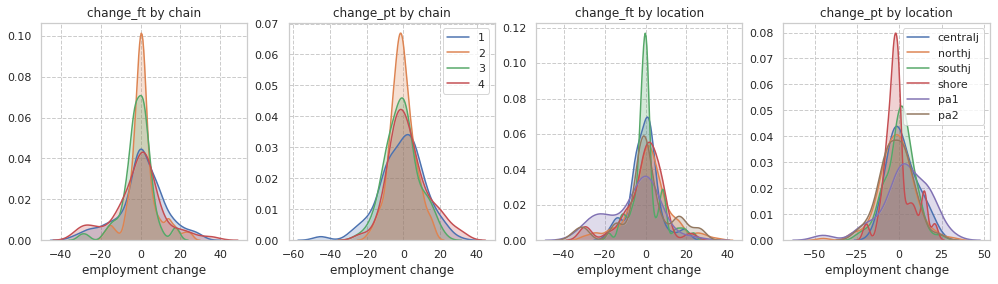

In [40]:
# libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# set figure structure
plt.subplots(1, 4, figsize=(17,4))

# manually plot density of employment change by chain without using pairplot
df_DiD_chain = pd.DataFrame(df[['change_ft', 'change_pt', 'chain']])

# loop over each column and plot distributions by chain
for i, col in enumerate(df_DiD_chain.columns[:2]):
    plt.subplot(1, 4, i+1)
    sns.kdeplot(df_DiD_chain.loc[df_DiD_chain['chain']==1, col], 
                shade=True, label='1')
    sns.kdeplot(df_DiD_chain.loc[df_DiD_chain['chain']==2, col], 
                shade=True, label='2')
    sns.kdeplot(df_DiD_chain.loc[df_DiD_chain['chain']==3, col], 
                shade=True, label='3')
    sns.kdeplot(df_DiD_chain.loc[df_DiD_chain['chain']==4, col], 
                shade=True, label='4')
    plt.xlabel('employment change')
    plt.title(col + ' by chain')
    if i == 1:
        plt.legend(loc='upper right')
    else:
        plt.legend().remove()

# manually plot DiD density by location without using pairplot
df_DiD_location = pd.DataFrame(df[['change_ft', 'change_pt', 'location']])

# loop over each column and plot distributions by location
for i, col in enumerate(df_DiD_location.columns[:2]):
    plt.subplot(1, 4, i+3)
    sns.kdeplot(df_DiD_location.loc[df_DiD_location['location']=='centralj', col], 
                shade=True, label='centralj')
    sns.kdeplot(df_DiD_location.loc[df_DiD_location['location']=='northj', col], 
                shade=True, label='northj')
    sns.kdeplot(df_DiD_location.loc[df_DiD_location['location']=='southj', col], 
                shade=True, label='southj')
    sns.kdeplot(df_DiD_location.loc[df_DiD_location['location']=='shore', col], 
                shade=True, label='shore')
    sns.kdeplot(df_DiD_location.loc[df_DiD_location['location']=='pa1', col], 
                shade=True, label='pa1')
    sns.kdeplot(df_DiD_location.loc[df_DiD_location['location']== 'pa2', col], 
                shade=True, label='pa2')
    plt.xlabel('employment change')
    plt.title(col + ' by location')
    if i == 1:
        plt.legend(loc='upper right')
    else:
        plt.legend().remove()

### Density of numerical data by chain and by location

Focus on full-time employment only as change_ft and change_pt have similar normal distribution.

- Employment is distinguishable by chain
- Wage is distinguishable both by chain and by location
- empft2 is more positive skewed than empft by chain, i.e., employment got better throughout chains
- empft2 has smaller variance by location, i.e., employment decreased throughout location

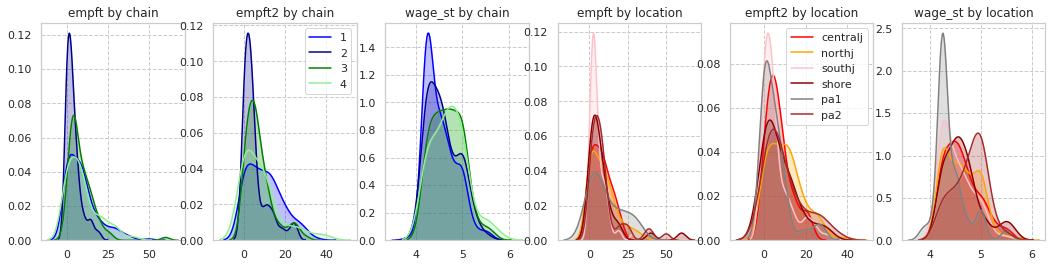

In [41]:
# set figure structure
plt.subplots(1, 6, figsize=(18,4))

# manually plot numerical density by chain without using pairplot
df_numerical_chain = pd.DataFrame(df[['empft', 'empft2', 'wage_st', 'chain']])

# loop over each column and plot distributions by chain
for i, col in enumerate(df_numerical_chain.columns[:3]):
    plt.subplot(1, 6, i+1)
    sns.kdeplot(df_numerical_chain.loc[df_numerical_chain['chain']==1, col], 
                shade=True, label='1', color='blue')
    sns.kdeplot(df_numerical_chain.loc[df_numerical_chain['chain']==2, col], 
                shade=True, label='2', color='darkblue')
    sns.kdeplot(df_numerical_chain.loc[df_numerical_chain['chain']==3, col], 
                shade=True, label='3', color='green')
    sns.kdeplot(df_numerical_chain.loc[df_numerical_chain['chain']==4, col], 
                shade=True, label='4', color='lightgreen')
    #plt.xlabel('employee change')
    plt.title(col + ' by chain')
    if i == 1:
        plt.legend(loc='upper right')
    else:
        plt.legend().remove()

# manually plot numerical density by location without using pairplot
df_numerical_location = pd.DataFrame(df[['empft', 'empft2', 'wage_st', 'location']])

# loop over each column and plot distributions by location
for i, col in enumerate(df_numerical_location.columns[:3]):
    plt.subplot(1, 6, i+4)
    sns.kdeplot(df_numerical_location.loc[df_numerical_location['location']=='centralj', col], 
                shade=True, label='centralj',color='red')
    sns.kdeplot(df_numerical_location.loc[df_numerical_location['location']=='northj', col], 
                shade=True, label='northj', color='orange')
    sns.kdeplot(df_numerical_location.loc[df_numerical_location['location']=='southj', col], 
                shade=True, label='southj', color='pink')
    sns.kdeplot(df_numerical_location.loc[df_numerical_location['location']=='shore', col], 
                shade=True, label='shore', color='darkred')
    sns.kdeplot(df_numerical_location.loc[df_numerical_location['location']=='pa1', col], 
                shade=True, label='pa1', color='grey')
    sns.kdeplot(df_numerical_location.loc[df_numerical_location['location']=='pa2', col], 
                shade=True, label='pa2', color='brown')
    plt.title(col + ' by location')
    if i == 1:
        plt.legend(loc='upper right')
    else:
        plt.legend().remove()

### Boxplot of numerical data by chain / location

Distribution of the number of full-time employee by chain and by location in New Jersey and Pennsylvania before and after the wage raise. Again, since the wage change had similar effect on both the full-time and part-time employees, we focus on visualising the full-time employee only here.
 
__Findings__

After the wage raise, observe the following major changes:

- The wage raise had a tendency of positive effect on pa2 area

__Chain 1:__

- Employment increased in centralj and northj
- Q1 became 0 in southj, i.e., decrease of employment
- Maximum number of employment aligned to 30 in northj, shore, and southj
- Variance of employment got smaller in pa2
- Maximum employment decreased but median increased in pa2

__Chain 2:__

- Employment range was downsized in centralj while upsized in northj
- Employment slightly increased in pa2

__Chain 3:__

- Variance employment got smaller in all area
- Employment downsized throughout the area

__Chain 4:__

- Q1 became 0 in all area except centralj, i.e., decrease of employment
- Maximum number of employment decreased in all area except centralj
- Q1 became 0 in pa1, i.e., decrease of employment
- Median of employment increased in pa2

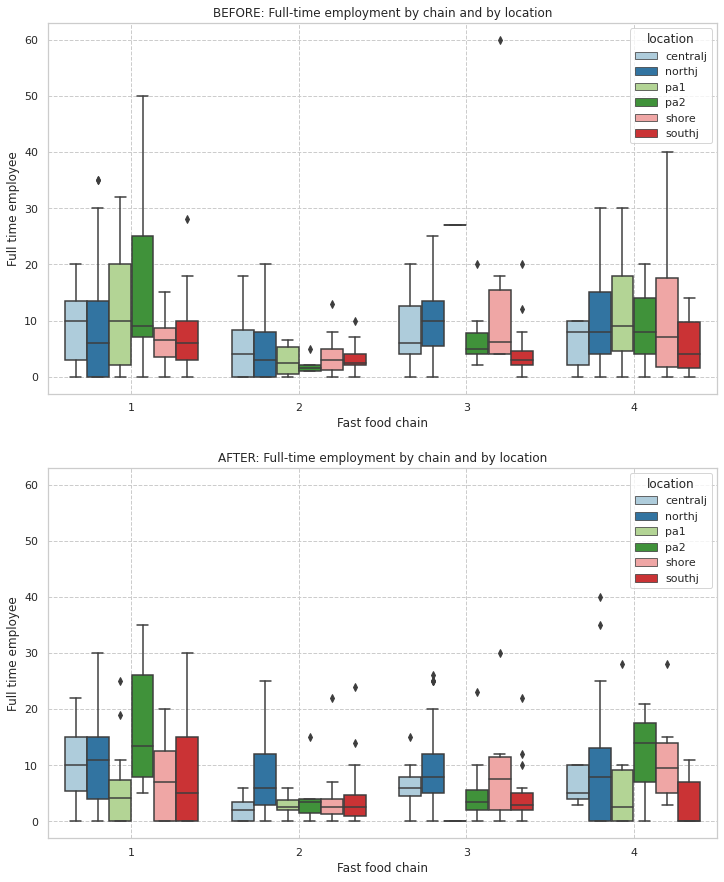

In [42]:
# set figure structure
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(12, 15))

# plot the full-time employment by chain and by location BEFORE change
ax1.set_title('BEFORE: Full-time employment by chain and by location')
g1 = sns.boxplot(y='empft', x='chain', hue='location',  
                 data=df, ax=ax1, palette='Paired')
ax1.set_xlabel('Fast food chain')
ax1.set_ylabel('Full time employee')
g1.grid(linestyle='--')

# plot the full-time employment by chain and by location AFTER change
ax2.set_title('AFTER: Full-time employment by chain and by location')
g2 = sns.boxplot(y='empft2', x='chain', hue='location', 
                 data=df,  ax=ax2, palette='Paired')
ax2.set_xlabel('Fast food chain')
ax2.set_ylabel('Full time employee')
g2.grid(linestyle='--')

## Categorical matrix visualisation

Count the fast food chains by area in New Jersey and Pennsylvania. 
 
- Chain 1 has the number one share in all locations
- For New Jersey, northj area is most popular for all chains to have their stores

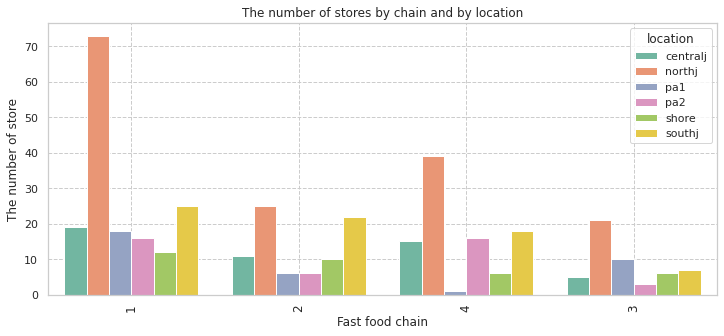

In [43]:
# set figure structure
fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=(12,5))

# plot the number of stores by chain and by location
ax1.set_title('The number of stores by chain and by location')
g1 = sns.countplot(x='chain', hue='location', data=df, ax=ax1, palette='Set2')
g1.set_xticklabels(labels = df['chain'].unique(), rotation=90, fontsize=12);
ax1.set_xlabel('Fast food chain')
ax1.set_ylabel('The number of store')
g1.grid(linestyle='--')

## Correlation data visualisation

Show the pearson correlation matrix for numerical data. To do that, we first convert 'chain' column to matrix using OneHotEncorder so we can visualize the correlations for all features at once.

In [44]:
from sklearn.preprocessing import OneHotEncoder

# drop 'location' column as it's already in the oroginal dataset as binary value
df.drop(columns=['location'], inplace=True)

# Create a categorical boolean mask
categorical_feature_mask = df.dtypes == 'category'

# Filter out the categorical columns into a list 
categorical_cols = df.columns[categorical_feature_mask].tolist()

# Instantiate the OneHotEncoder Object
ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)

# Apply ohe on data
ohe.fit(df[categorical_cols])
cat_ohe = ohe.transform(df[categorical_cols])

#Create a Pandas DataFrame of the hot encoded column
ohe_df = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names(input_features = categorical_cols))

#concat with original data and drop original columns
df = pd.concat([df, ohe_df], axis=1).drop(columns = categorical_cols, axis=1)
df.head()

,state,southj,centralj,northj,shore,pa1,pa2,empft,emppt,wage_st,empft2,emppt2,wage_st2,change_pt,change_ft,chain_1,chain_2,chain_3,chain_4
0,0,0,0,0,0,1,0,30.0,15.0,3.87,3.5,35.0,4.30,20.0,-26.5,1.0,0.0,0.0,0.0
1,0,0,0,0,0,1,0,6.5,6.5,4.02,0.0,15.0,4.45,8.5,-6.5,0.0,1.0,0.0,0.0
2,0,0,0,0,0,1,0,3.0,7.0,4.57,3.0,7.0,5.00,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,0,1,0,20.0,20.0,5.00,0.0,36.0,5.25,16.0,-20.0,0.0,0.0,0.0,1.0
4,0,0,0,0,0,1,0,6.0,26.0,5.50,28.0,3.0,4.75,-23.0,22.0,0.0,0.0,0.0,1.0


Now visualize the correlation matrix. 

Learning change_ft (employment change) means learning empft2 (employment after the wage raise).

- See the rows for change_ft and empft2, all features contribute to variability little by little. In other words, learning employment change with just a few features might be difficult.

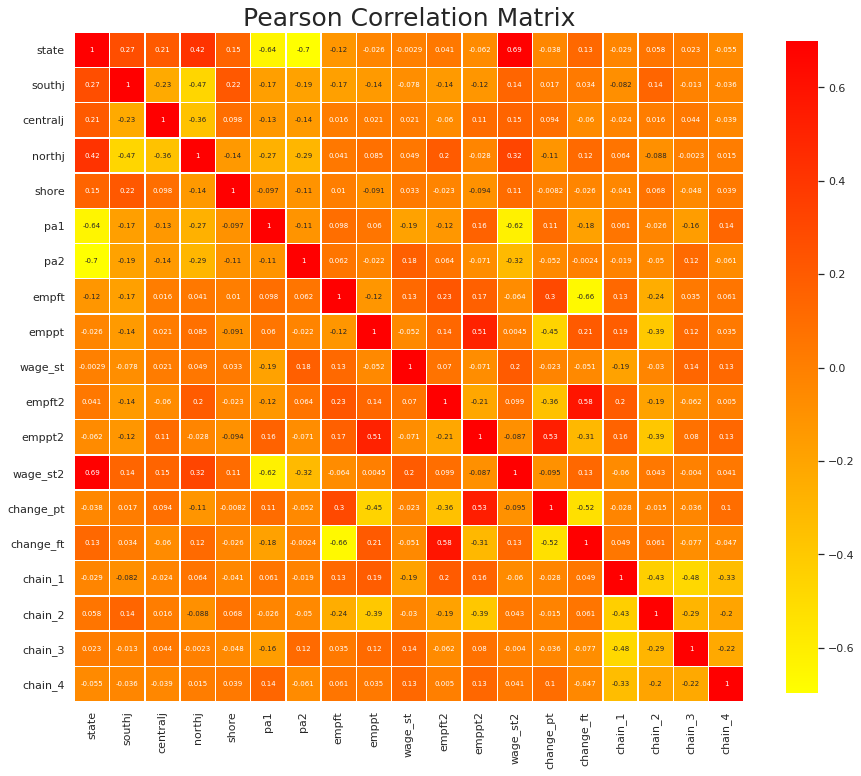

In [54]:
# set figure size, style, and title
plt.figure(figsize=(15,15))
sns.set(style="whitegrid", font_scale=1)
sns.set_style("whitegrid",{"grid.linestyle":"--"})
plt.title('Pearson Correlation Matrix', fontsize=25)

# plot the Pearson Correlation Matrix
sns.heatmap(df.corr(), linewidths=0.45, vmax=0.7, square=True, cmap="autumn_r", linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .8});

In conclusion, based on the explorately data analysis, I consider using all features to learn change_ft in the machine learning model as they all seem contributing variablity. However, I should also run GridSearchCV to find the optimal number of features to get the best performance.

# Machine learning model

## Identified features and selection reasons

I identified the following features and target to be used in my data regression model, along with the selection reasons and importance stated. In addition, I will further search the best combination of features by tuning hyper-parameter using GridSearchCV.  

__Feature X__

- state	: to distinguish state, New Jersey or Pennsylvania
- southj : to distinguish the location in New Jersey
- centralj : to distinguish the location in New Jersey
- northj : to distinguish the location in New Jersey
- shore	: to distinguish the location in New Jersey
- pa1 : to distinguish the location in Pennsylvania
- pa2 : to distinguish the location in Pennsylvania
- empft	: to learn the full-time employment before change
- emppt	: to learn the part-time employment before change
- wage_st : to learn the minimum wage before change
- wage_st2 : to learn the new minimum wage
- change_pt	: to simulate change_ft as it has similar distribution. 
- chain_1 : to distinguish chain
- chain_2 : to distinguish chain
- chain_3 : to distinguish chain
- chain_4 : to distinguish chain
 
__Target y__

- change_ft: to predict the change of the number of employees after the wage raise

__Dropped features__

Drop rest of the following features from the dataframe as they can cause information leaks.

- change_ft: This is target y  
- empft2: Directly tells the change_ft value
- emppt2: Future value should not be included

In [46]:
# extract features for X and y
X = df.drop(['change_ft', 'empft2','emppt2'], axis=1)
y = df['change_ft'].values

# print the number of features for X
len(X.columns)

16

## Machine learning algorithm

I employed Linear Regression for my model. The reasons for choosing this algorithm are as follows:

- Useful for continuous value prediction
- Simple to model the features that include multiple dummy variables
- Best complexity, e.g., K-Nearest Neighbor algorithm maybe too simple, and Polynomial legression would be too complex for X with many features

## Hyper-parameter tuning 

To perform best in this model, search the best features using grid search cross-validation (GridSearchCV) and recursive feature elimination (RFE). GridSearchCV finds the best hyper-parameters for the model and RFE recursively eliminates the number of features to help searching the best number/combination of features.

In [47]:
# libraries for tuning hyper-parameter and parameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# create a cross-validation scheme
folds = KFold(n_splits=5, shuffle =True, random_state=100)

# specify range of hyper-parameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 17))}]

# perform grid search
# specify model
lm = LinearRegression()
lm.fit(X, y)
rfe = RFE(lm)             

# call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', # use R2 as score metric
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model and show the best number of features
model_cv.fit(X, y) 
model_cv.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.0s finished


{'n_features_to_select': 16}

Confirmed that 16 as the optimal number of features. That said, using the maximum number of features would lead the best performance.

## Parameter tuning 

Next, tune the parameters for the linear regression model. 

In [48]:
# specify the parameters to be searched
parameters = {'fit_intercept':[True, False], 
              'normalize':[True, False], 
              'copy_X':[True, False]}

# call GridSearchCV 
grid = GridSearchCV(lm , parameters, cv=5)

# fit the model
grid.fit(X, y)
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

# Programming style

The source code for this project follows general coding convention including:

- [x] Correct code indentation
- [x] Not using unnamed numerical constants
- [x] Assigning of meaningful names to variables and subroutines
- [x] Comments on every variable and sub-routine
- [x] Description of a call to a library method

<h1>III. Conclusions</h1>

# Performance of results

## Final model Evaluation
Set the resulted best parameters to the final model, run it, and test the model. Evaluate the results using Mean Squared Error (RMSE) and R2 scores as metrics.

In [49]:
# final model
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error, r2_score

# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

# reset the model with the best parameters
lm_best = LinearRegression(copy_X=True, 
                           fit_intercept=True, 
                           normalize=False)

# fit the model
lm_best.fit(X_train, y_train)

# predict DiDft
y_pred = lm_best.predict(X_test)

# print the prediction result 
print(y_pred.round(1))

# print the ground truth
print(y_test)

# print RMSE and R2
print('Mean Squared Error:' ,mean_squared_error(y_test, y_pred))
print('R2 score:' ,r2_score(y_test, y_pred))

[  1.5   4.3  -1.7   1.8   6.8  10.2   5.1   4.5  -4.    7.  -10.3  -2.8
   0.4  -0.   -5.6   7.8  -1.9   8.7   1.2  11.    5.9   5.4   2.   -0.7
   4.1  -9.4  -0.9  -9.3   4.5  -6.4  -5.6  -9.6   2.6   1.2   3.8  -5.2
   2.8   3.5  -3.9   3.6   4.9 -12.3   1.4 -22.2 -15.9   4.1  11.7   2.5
  10.3   0.4   3.4   5.    4.8   4.8 -22.4   5.6   2.2   2.6  10.7  -4.1
 -10.7 -11.    4.    0.9 -23.2   0.6  -0.1  -6.6  -4.4   6.1  -0.4   3.5
   1.4  15.1  -9.8   4.6  -2.8  -5. ]
[ -1.    2.   -2.    0.    8.    2.    8.    0.   -3.    6.5   2.   -8.
  10.   -3.    5.   21.   16.    2.   -4.   15.   -1.    5.   -4.5   2.
   0.    4.   -3.   -5.    7.5   3.    0.    7.5   1.   -3.   16.   -6.5
  -4.    1.    0.   -2.5  17.  -15.    9.  -31.  -15.   -1.   -4.    1.
  15.   11.    7.    3.    2.5   0.  -35.   -2.5  -1.    1.   16.    6.
 -10.  -15.    4.    2.  -27.    2.   -8.   -5.   -2.    3.  -12.    3.
  -5.   30.  -12.    1.  -12.   -8. ]
Mean Squared Error: 49.17189888824255
R2 score: 0.534

## R2 score evaluation with cross validation
Show the numerical cross validation results by different number of features and by each holdout set. Observe 'rank_test_score' and 'mean_train_score' columns, using 16 features ranked first with the highest R2 score.

In [50]:
# convert the cv results to dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)

# show relevant information only
cv_results[['param_n_features_to_select',
            'rank_test_score',
            'split0_train_score',
            'split1_train_score',
            'split2_train_score',
            'split3_train_score',
            'split4_train_score',
            'mean_train_score']]

,param_n_features_to_select,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score
0,1,15,0.043802,0.011400,0.041649,0.040123,0.026186,0.032632
1,2,16,0.048221,0.014028,0.062354,0.050588,0.034543,0.041947
2,3,14,0.062766,0.023947,0.067033,0.053966,0.040697,0.049682
3,4,13,0.066956,0.024964,0.070222,0.055814,0.044404,0.052472
4,5,11,0.068288,0.022206,0.070640,0.059179,0.046412,0.053345
5,6,12,0.068525,0.024670,0.070731,0.059675,0.046473,0.054015
6,7,10,0.068744,0.022061,0.523343,0.059812,0.046493,0.144090
7,8,7,0.489812,0.021840,0.523452,0.515249,0.457443,0.401559
8,9,8,0.489812,0.010020,0.523750,0.515249,0.457443,0.399255
9,10,9,0.489812,0.015967,0.524017,0.515249,0.457443,0.400498


## Visualize R2 score evaluation with cross validation
Plot the above dataframe for better intuition. The performance with 8 features significantly increases comapre to the one with 6 features. After the number of features at 10, it shows a smooth rise again.

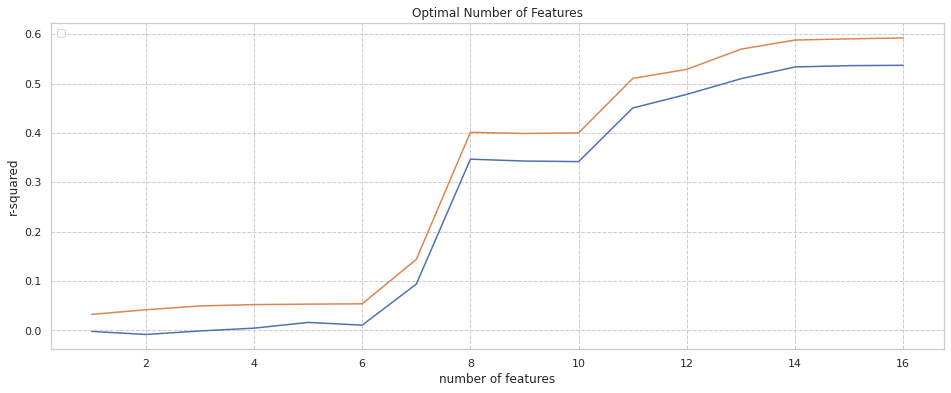

In [55]:
# set figure size, labels, and title 
plt.figure(figsize=(16, 6))
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# plot R2 test score of cv results
plt.plot(cv_results["param_n_features_to_select"], 
         cv_results["mean_test_score"])

# plot R2 train score of cv results
plt.plot(cv_results["param_n_features_to_select"], 
         cv_results["mean_train_score"])

## Evaluate with LinearSVR
Evaluation with other ML algorithm: Linear Support Vector Regression (LinearSVR) with the tuned optimal parameters. Since this is an optional evaluation, I omit presenting tuning process as it's same as LinearRegression.

In [52]:
from sklearn.svm import LinearSVR

# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)
# fit the model and predict y
clf = LinearSVR(C=1.0, epsilon=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# print the result
print(y_pred.round(1))
print(y_test)
print('Mean Squared Error:' ,mean_squared_error(y_test, y_pred))
print('R^2 score:' ,r2_score(y_test, y_pred))

[ -0.3   3.1  -3.1  -0.    3.8   9.2   3.1   1.4  -4.8   4.6 -12.   -4.6
  -0.2  -2.   -6.2   6.5  -3.    7.2   0.1   9.8   4.    4.6   0.9  -1.5
   1.  -10.1  -2.4 -10.1   3.9  -7.3  -5.8 -10.6   0.6  -1.2   3.   -6.2
   2.2   1.8  -5.9   1.9   2.9 -13.3  -0.4 -22.9 -16.    3.4  10.2  -0.1
   9.4  -0.2   1.6   3.1   3.4   3.4 -23.    5.3  -0.9   1.    9.8  -4.9
 -12.  -12.    2.8  -1.5 -23.2  -1.   -2.5  -7.3  -5.4   4.4  -1.2   1.5
  -0.5  14.1 -11.5   2.4  -4.7  -6.9]
[ -1.    2.   -2.    0.    8.    2.    8.    0.   -3.    6.5   2.   -8.
  10.   -3.    5.   21.   16.    2.   -4.   15.   -1.    5.   -4.5   2.
   0.    4.   -3.   -5.    7.5   3.    0.    7.5   1.   -3.   16.   -6.5
  -4.    1.    0.   -2.5  17.  -15.    9.  -31.  -15.   -1.   -4.    1.
  15.   11.    7.    3.    2.5   0.  -35.   -2.5  -1.    1.   16.    6.
 -10.  -15.    4.    2.  -27.    2.   -8.   -5.   -2.    3.  -12.    3.
  -5.   30.  -12.    1.  -12.   -8. ]
Mean Squared Error: 50.12567804441967
R^2 score: 0.52

## Evaluate with RandomForestRegressor
Evaluation with other ML algorithm: Random Forest Regressor with the tuned optimal parameters.

In [53]:
from sklearn.ensemble import RandomForestRegressor

# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)
# fit the model and predict y
rf = RandomForestRegressor(bootstrap=True, 
                           max_features='auto', 
                           min_samples_split=8, 
                           n_estimators=21)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# print the result
print(y_pred.round(1))
print(y_test)
print('Mean Squared Error:' ,mean_squared_error(y_test, y_pred))
print('R^2 score:' ,r2_score(y_test, y_pred))

[  1.8   6.   -2.3   0.5  10.9   9.7   9.2   2.8   0.9   6.6  -3.7  -0.1
   2.1  -0.2  -4.2  16.5   1.8   9.   -0.5  17.4   8.5  16.5   1.    1.6
   1.7  -7.9  -0.4  -6.2   2.8  -4.4  -9.5 -10.6   0.4  -0.2   5.7   5.
   1.3   0.9  -6.5   4.2   5.4 -15.9   0.9 -22.4 -16.7   5.7   5.   -0.2
   8.6   6.1   8.2   1.1   1.5   0.8 -21.5   8.7   1.4   0.2   8.8  -6.9
  -6.2  -9.6   9.4  -1.3 -23.   -0.4   0.   -4.6  -2.8   9.9   4.9   2.1
   2.6  18.9  -8.3   3.4   0.1  -5.4]
[ -1.    2.   -2.    0.    8.    2.    8.    0.   -3.    6.5   2.   -8.
  10.   -3.    5.   21.   16.    2.   -4.   15.   -1.    5.   -4.5   2.
   0.    4.   -3.   -5.    7.5   3.    0.    7.5   1.   -3.   16.   -6.5
  -4.    1.    0.   -2.5  17.  -15.    9.  -31.  -15.   -1.   -4.    1.
  15.   11.    7.    3.    2.5   0.  -35.   -2.5  -1.    1.   16.    6.
 -10.  -15.    4.    2.  -27.    2.   -8.   -5.   -2.    3.  -12.    3.
  -5.   30.  -12.    1.  -12.   -8. ]
Mean Squared Error: 48.56181538324016
R^2 score: 0.539

# Closing remarks/statements

## Evaluation, Contribution, and Transferability

The obtained results yield an R2 score of 50% or higher, showing room for model improvement. At the same time, they show the potential of the model as a prototype. In other words, further research on variables and ML models may help predict changes in employment by area and industry due to government-mandated wage revisions. This would contribute to the social sciences. My model may be transferable to other regions. For example, if we identify an employment distribution in Chicago, Illinois, for example, that is similar to the one in the above box plot, we may be able to simulate the impact of minimum wage increases on employment in Burger Kings in the area by applying the data points from central New Jersey. In this case, being able to identify an approximate increase or decrease of employment would be useful, even if we cannot obtain a precise figure.  

## Reproduction

There may be some options to run this project in another environment. Example options are as follows:

Option 1) You can reproduce it as an estimation model of Difference-in-Differences using R. Benefits are that the model is simpler and has been reproduced by a team at MIT. For example, you can use the equation:

$$empft2_i - empft_i = \alpha_0 + \alpha_1*state_i + error_i $$

to regress employment changes by state. Drawbacks are that it is not a prediction model for machine learning and that you need to be careful for the collinearity of dummy variables. 

Option 2) You can also use scikit-learn to train and run this project with other regression-based ML algorithms as I did with Random Forest Regressor (RandomForestRegressor) and Support Vector Regressor (LinearSVR). Benefits are that it can be run just by creating a new instance, and data preprocessing is not required for reproduction. Drawbacks are that certain algorithms may not be compatible with my model and performance may be degraded depending on the algorithm. Moreover, the number of useful algorithms may be limited. For example, running a 5 degree of Polynomial regression with 5 numeric variables and 11 dummy variables as X would just produce large negative numbers and wouldn’t yield meaningful results.